# Linear Regression - California Houses Dataset


In [41]:
import sys
import os
sys.path.append('..')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.preprocessing import preprocess_houses_data
from src.models.linear_regression import LinearRegression
from src.utils.visualization import plot_training_curves, plot_predictions, plot_feature_importance

plt.style.use('seaborn-v0_8')
torch.manual_seed(42)
np.random.seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

X_train, X_test, y_train, y_test, feature_names = preprocess_houses_data('../data/California_Houses.csv', device=device)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Features: {X_train.shape[1]}")
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"y_train range: {y_train.min().item():.2f} - {y_train.max().item():.2f}")
print(f"y_train mean: {y_train.mean().item():.2f}")



Device: cuda
X_train shape: torch.Size([16512, 24])
X_test shape: torch.Size([4128, 24])
y_train shape: torch.Size([16512])
y_test shape: torch.Size([4128])
Features: 24
Train samples: 16512
Test samples: 4128
y_train range: 14999.00 - 500001.00
y_train mean: 206935.38


In [42]:
learning_rate = 0.01
max_epochs = 1000

model = LinearRegression(
    learning_rate=learning_rate,
    max_epochs=max_epochs,
    device=device
)

print(f"Learning rate: {learning_rate}")
print(f"Max epochs: {max_epochs}")

model.fit(X_train, y_train, X_test, y_test)
print(f"Epochs: {len(model.history['train_loss'])}")
print(f"Final train loss: {model.history['train_loss'][-1]:.4f}")
if model.history['val_metrics']:
    print(f"Final val R²: {model.history['val_metrics'][-1]['r2']:.4f}")
    print(f"Final val RMSE: {model.history['val_metrics'][-1]['rmse']:.4f}")

y_pred = model.predict(X_test)
test_metrics = model.score(X_test, y_test)

print(f"Test samples: {test_metrics['n']}")
print(f"Sum absolute errors: {test_metrics['sum_abs']:.4f}")
print(f"Sum squared errors: {test_metrics['sum_sq']:.4f}")
print(f"Test MSE: {test_metrics['mse']:.4f}")
print(f"Test MAE: {test_metrics['mae']:.4f}")
print(f"Test RMSE: {test_metrics['rmse']:.4f}")
print(f"Test R²: {test_metrics['r2']:.4f}")
if 'mape' in test_metrics:
    print(f"Test MAPE: {test_metrics['mape']:.4f}%")

baseline_pred = torch.full_like(y_test, y_train.mean())
baseline_mse = torch.mean((y_test - baseline_pred) ** 2).item()
baseline_mae = torch.mean(torch.abs(y_test - baseline_pred)).item()

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline MAE: {baseline_mae:.4f}")



Learning rate: 0.01
Max epochs: 1000
Epochs: 1000
Final train loss: 4240148736.0000
Final val R²: 0.6553
Final val RMSE: 67963.3125
Test samples: 4128
Sum absolute errors: 198185280.0000
Sum squared errors: 19067280818176.0000
Test MSE: 4619011584.0000
Test MAE: 48010.0000
Test RMSE: 67963.3125
Test R²: 0.6553
Test MAPE: 28.7672%
Baseline MSE: 13400008704.0000
Baseline MAE: 91583.6719


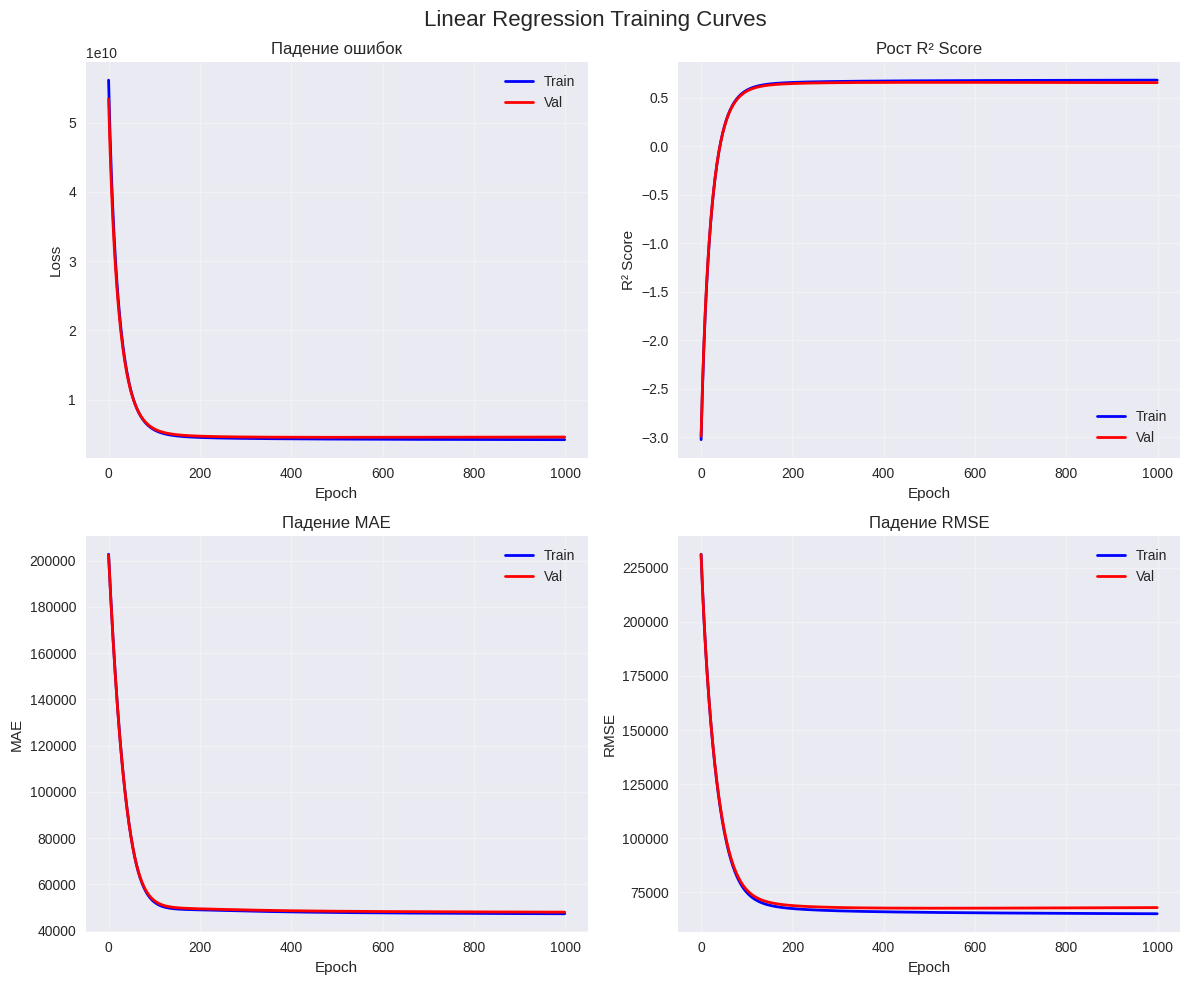

In [43]:
plot_training_curves(model.history, title="Linear Regression Training Curves", model_type="regression", max_epochs_display=1000)

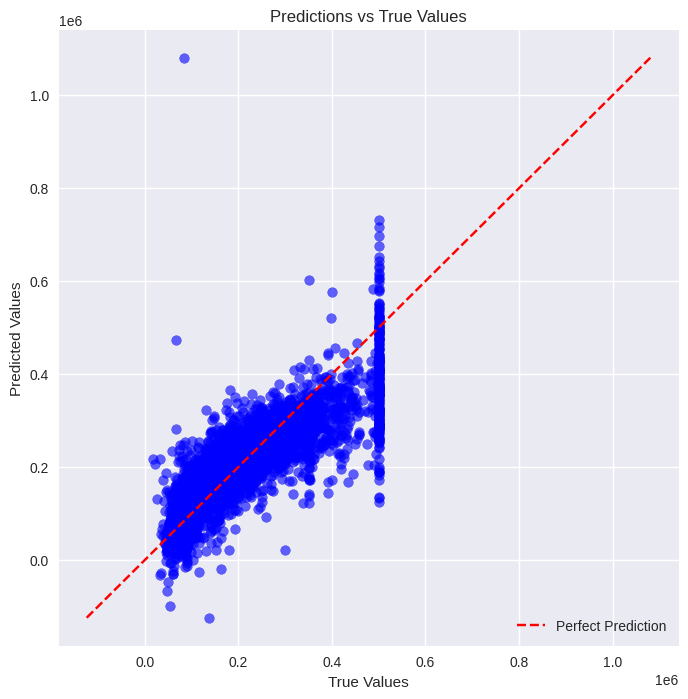

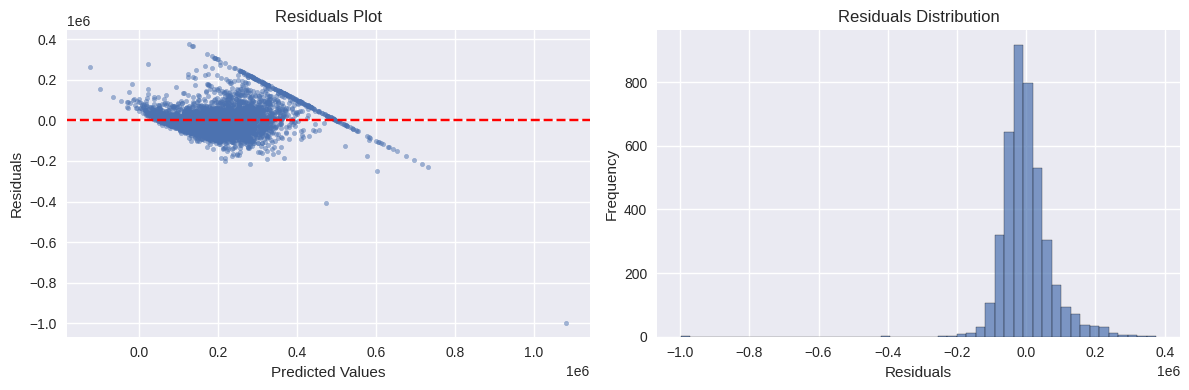

In [44]:
plot_predictions(y_test, y_pred, title="Predictions vs True Values")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
residuals = (y_test - y_pred).cpu().numpy()
plt.scatter(y_pred.cpu().numpy(), residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


                           Feature        Weight    Abs_Weight
0                    Median_Income  65021.523438  65021.523438
20                     LuxuryIndex  38450.953125  38450.953125
7                        Longitude -28919.105469  28919.105469
13               RoomsPerHousehold -28901.650391  28901.650391
9                   Distance_to_LA -24890.410156  24890.410156
4                       Population -22375.224609  22375.224609
15                    Spaciousness  16810.755859  16810.755859
8                Distance_to_coast -14880.863281  14880.863281
1                       Median_Age  12007.136719  12007.136719
5                       Households  11996.086914  11996.086914
19                  RoomEfficiency  10945.669922  10945.669922
14                 BedroomsPerRoom  10945.656250  10945.656250
3                     Tot_Bedrooms  10292.050781  10292.050781
23      Coastal_Income_Interaction   8959.082031   8959.082031
16               MinDistanceToCity  -8756.011719   8756

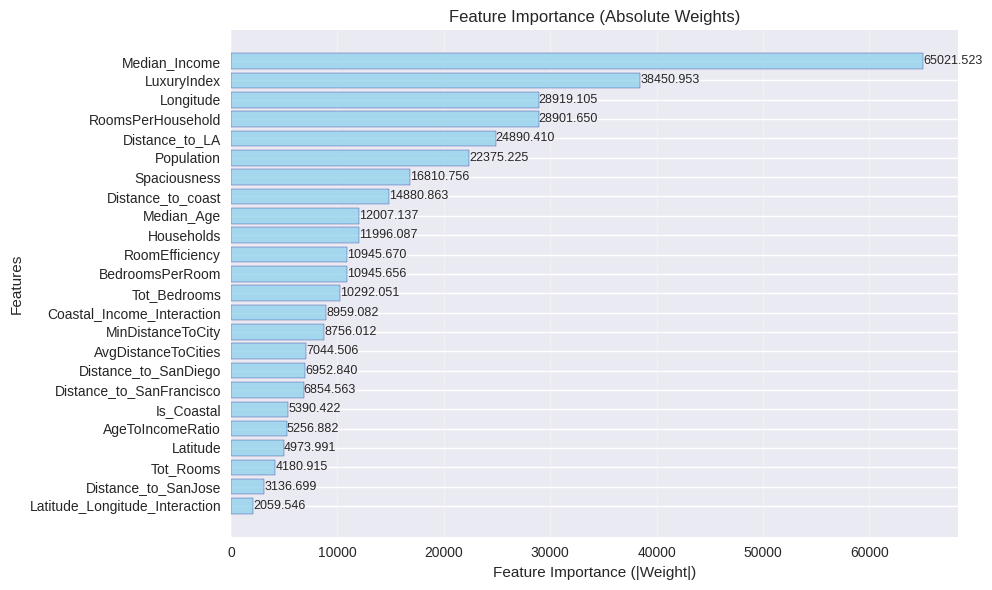


Соответствие признаков и весов:
  Latitude_Longitude_Interaction: -2059.5457
  Distance_to_SanJose: 3136.6995
  Tot_Rooms: 4180.9150
  Latitude: -4973.9907
  AgeToIncomeRatio: -5256.8823
  Is_Coastal: 5390.4219
  Distance_to_SanFrancisco: 6854.5630
  Distance_to_SanDiego: 6952.8398
  AvgDistanceToCities: -7044.5063
  MinDistanceToCity: -8756.0117
  Coastal_Income_Interaction: 8959.0820
  Tot_Bedrooms: 10292.0508
  BedroomsPerRoom: 10945.6562
  RoomEfficiency: 10945.6699
  Households: 11996.0869
  Median_Age: 12007.1367
  Distance_to_coast: -14880.8633
  Spaciousness: 16810.7559
  Population: -22375.2246
  Distance_to_LA: -24890.4102
  RoomsPerHousehold: -28901.6504
  Longitude: -28919.1055
  LuxuryIndex: 38450.9531
  Median_Income: 65021.5234
360002.53


In [45]:
weights = model.weights.detach().cpu().numpy()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
}).sort_values('Abs_Weight', ascending=False)

print(feature_importance)

plot_feature_importance(weights, feature_names, title="Feature Importance (Absolute Weights)")

print(feature_importance['Abs_Weight'].sum())